# Modules

In [1]:
import urllib2
import xmltodict
import pandas as pd
from datetime import datetime 
import statsmodels.api as sm
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import requests
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

In [2]:
import wellapplication as wa
print(wa.__version__)

0.3.5


# Functions

In [3]:
def scatterColor(x0,y,w):
    """Creates scatter plot with points colored by variable.
    All input arrays must have matching lengths

    Arg:
        x0 (array): 
            array of x values
        y (array): 
            array of y values
        w (array): 
            array of scalar values

    Returns:
        slope and intercept of best fit line
    
    """
    import matplotlib as mpl
    import matplotlib.cm as cm
    cmap = plt.cm.get_cmap('RdYlBu')
    norm = mpl.colors.Normalize(vmin=w.min(), vmax=w.max())
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    m.set_array(w)
    sc = plt.scatter(x0, y, label='', color = m.to_rgba(w))

    xa = sm.add_constant(x0)

    est = sm.RLM(y, xa).fit()
    r2 = sm.WLS(y, xa, weights=est.weights).fit().rsquared
    slope = est.params[1]

    x_prime = np.linspace(np.min(x0),np.max(x0),100)[:, np.newaxis]
    x_prime = sm.add_constant(x_prime)
    y_hat = est.predict(x_prime)

    const = est.params[0]
    y2 = [i*slope + const for i in x0]

    plt.xlabel('Barometric Pressure (ft water)')
    plt.ylabel('Transducer Pressure (ft water)')
    lin = linregress(x0,y)
    x1 = np.arange(np.min(x0), np.max(x0),0.1)
    y1 = [i*lin[0]+lin[1] for i in x1]
    y2 = [i*slope+const for i in x1]
    plt.plot(x1,y1,c='g',label='simple linear regression m = {:.2f} b = {:.0f}, r^2 = {:.2f}'.format(lin[0],lin[1],lin[2]**2))
    plt.plot(x1,y2,c='r',label='rlm regression m = {:.2f} b = {:.0f}, r2 = {:.2f}'.format(slope,const,r2))
    plt.legend()
    cbar = plt.colorbar(m)

    cbar.set_label('Julian Date')

    return slope,const,r2

def regressRLM(x0,y,w):
    """Creates scatter plot with points colored by variable.
    All input arrays must have matching lengths

    Arg:
        x0 (array): 
            array of x values
        y (array): 
            array of y values
        w (array): 
            array of scalar values

    Returns:
        slope and intercept of best fit line
    
    """

    xa = sm.add_constant(x0)

    est = sm.RLM(y, xa).fit()
    r2 = sm.WLS(y, xa, weights=est.weights).fit().rsquared
    slope = est.params[1]

    x_prime = np.linspace(np.min(x0),np.max(x0),100)[:, np.newaxis]
    x_prime = sm.add_constant(x_prime)
    y_hat = est.predict(x_prime)

    const = est.params[0]
    y2 = [i*slope + const for i in x0]

    return slope,const,r2

# Import Data

## Files

In [4]:
files = "M:/PROJECTS/Juab_Valley/Solinst Files/"

## Import Transducer Water Levels

In [5]:
#import data
jun15 = wa.new_xle_imp(files+'06-12-2015.xle')
nov15 = wa.new_xle_imp(files+'11-12-2015.xle')
jun16 = wa.new_xle_imp(files+'F3-06 06-09-2016.xle')
dec16 = wa.new_xle_imp(files+'F3-06 12-13-2016.xle')
dfs = [jun15,nov15,jun16,dec16]

#fix jumps
for df in dfs:    
    df = wa.jumpfix(df,'Level',0.2)

#trim out of water data
nov15s = wa.dataendclean(nov15,'Level')
    

#combine datasets
wls = pd.concat([jun15,nov15s,jun16,dec16])
#resample
well_hr = wa.hourly_resample(wls)


Units in psi, converting to ft...


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\pandas\core\generic.py:5128: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\wellapplication\transport.py:797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  jump['cumul'] = jump.loc[:, 'delta' + meas].cumsum()


                     Temperature      Level        name  MeasuredLevel  \
DateTime                                                                 
2015-03-30 08:30:00       13.074  50.090553  06-12-2015      50.090553   
2015-03-30 08:32:00       13.069  50.367128  06-12-2015      50.367128   

                     deltaLevel     cumul  
DateTime                                   
2015-03-30 08:30:00   -0.285105 -0.285105  
2015-03-30 08:32:00    0.278543 -0.006562  
                     Temperature    Level        name  MeasuredLevel  \
DateTime                                                               
2015-06-16 18:00:00       13.093  49.5905  11-12-2015        49.5905   

                     deltaLevel    cumul  
DateTime                                  
2015-06-16 18:00:00     21.8291  21.8291  
Empty DataFrame
Columns: [Temperature, Level, name, MeasuredLevel, deltaLevel, cumul]
Index: []
Empty DataFrame
Columns: [Temperature, Level, name, MeasuredLevel, deltaLevel, cumul]

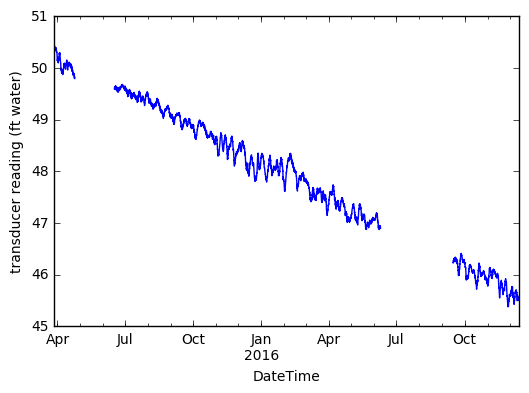

In [6]:
well_hr['Level'].plot()
plt.ylabel('transducer reading (ft water)')

## Import BaroLogger Data

In [7]:
bjun15 = wa.new_xle_imp(files+'06-16-2015-baro.xle')
bdec16 = wa.new_xle_imp(files+'F3-06 baro 12-13-2016.xle')
bjun16 = wa.new_xle_imp(files+'F3-06 baro 06-09-2016.xle')
baro = pd.concat([bjun15,bjun16,bdec16])
baro_hr = wa.hourly_resample(baro)

Temp in F, converting to C
Units in psi, converting to ft...
Temp in F, converting to C
Units in psi, converting to ft...
Temp in F, converting to C
Units in psi, converting to ft...


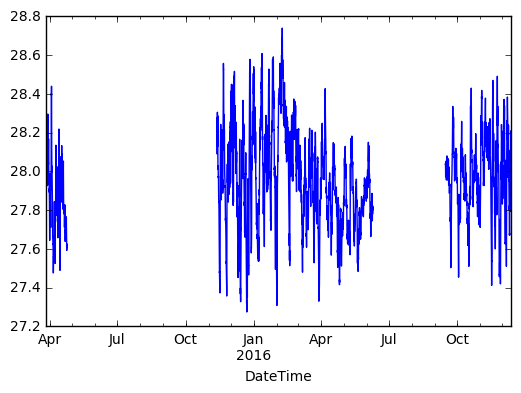

In [8]:
baro_hr.Level.plot()

In [9]:
token = "1ab92e63dd924c6189e6d5e1015c2645"
station = 'KU14'
html = 'https://api.synopticlabs.org/v2/stations/timeseries?token={:}&stid={:}\
&state=ut&start={:%Y%m%d}0000&end={:%Y%m%d%H%M}&units=pres|mb,precip|in&output=csv'.format(token,station,well_hr.index[0],well_hr.index[-1])
mesobaro = pd.read_csv(html,skiprows=8,usecols=[1,2,15],index_col=0,parse_dates=True,names=['datetime','pressure_pascals','precip_in'])

mesobaro_hr = wa.hourly_resample(mesobaro).shift(-6)
mesobaro_hr['baro_ft'] = mesobaro_hr['pressure_pascals']*0.000334562

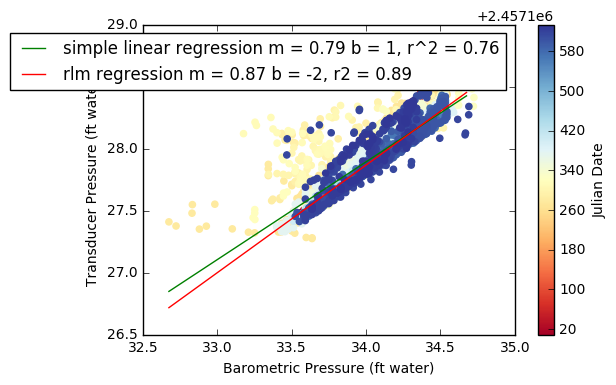

In [10]:
baros = pd.merge(mesobaro_hr,baro_hr,left_index=True,right_index=True,how='left')

baros.drop(['MeasuredLevel','Temperature','name','precip_in','pressure_pascals'],inplace=True,axis=1)
baroslim = baros.dropna()
m,b,r2 = scatterColor(baroslim['baro_ft'],baroslim['Level'],baroslim.index.to_julian_date())

baros['modeld_bp'] = baros['baro_ft'].apply(lambda x: m*x + b)

def fillB(x):
    if np.isnan(x[0]):
        return x[1]
    else:
        return x[0]
    
baros['Barometer'] = baros[['Level','modeld_bp']].apply(lambda x: fillB(x),1)

In [11]:
baros['BaroInt'] = baros['Barometer'].interpolate(how='time')
#baros['BaroInt'].plot()
WellBaro = pd.merge(well_hr,baros,right_index=True,left_index=True,how='left')
WellBaro = WellBaro.drop(['name','Level_y','Temperature','MeasuredLevel'],axis=1)


In [12]:
WellBaro_slim = WellBaro.dropna()
days = pd.date_range(start= WellBaro_slim.index[0],end= WellBaro_slim.index[-1],frequency='2D')
slp = []
inter = []
for i in range(len(days)-1):
    subst = WellBaro_slim[(WellBaro_slim.index > days[i]) & (WellBaro_slim.index < days[i+1])]
    if len(subst) > 0:
        try:
            m, b, r2 = regressRLM(subst.BaroInt,subst.Level_x,subst.index.to_julian_date())
            if r2 > 0.85:
                slp.append(m)
                inter.append(b)
        except:
            pass
slpmed = np.median(slp)
intermed = np.median(inter)
print(slpmed,intermed)


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\statsmodels\regression\linear_model.py:1148: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\statsmodels\regression\linear_model.py:1148: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\statsmodels\robust\robust_linear_model.py:287: RuntimeWarning: invalid value encountered in divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\numpy\linalg\linalg.py:1546: RuntimeWarning: invalid value encountered in greate

(0.39351024892628317, 36.899414366155725)


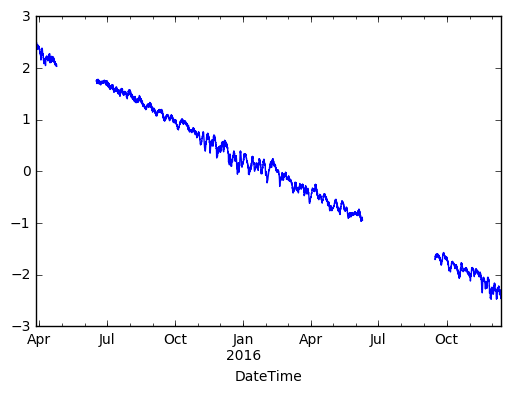

In [13]:
WellBaro['adjwl'] = WellBaro['Level_x'] - WellBaro['BaroInt']
WellBaro['corrwl'] = WellBaro[['Level_x','BaroInt']].apply(lambda x: x[0] - (x[1]*slpmed + intermed),1)
WellBaro['corrwl'].plot()

In [14]:
manual = pd.read_excel(files+'F3-06 WLs.xlsx','F3-06',index_col=2)

In [15]:
wa.rollmeandiff(manual,'Elev',WellBaro,'corrwl',win=10)

5150.712

In [16]:
WellBaro['wl_elev'] = WellBaro['corrwl'] + 5150.712

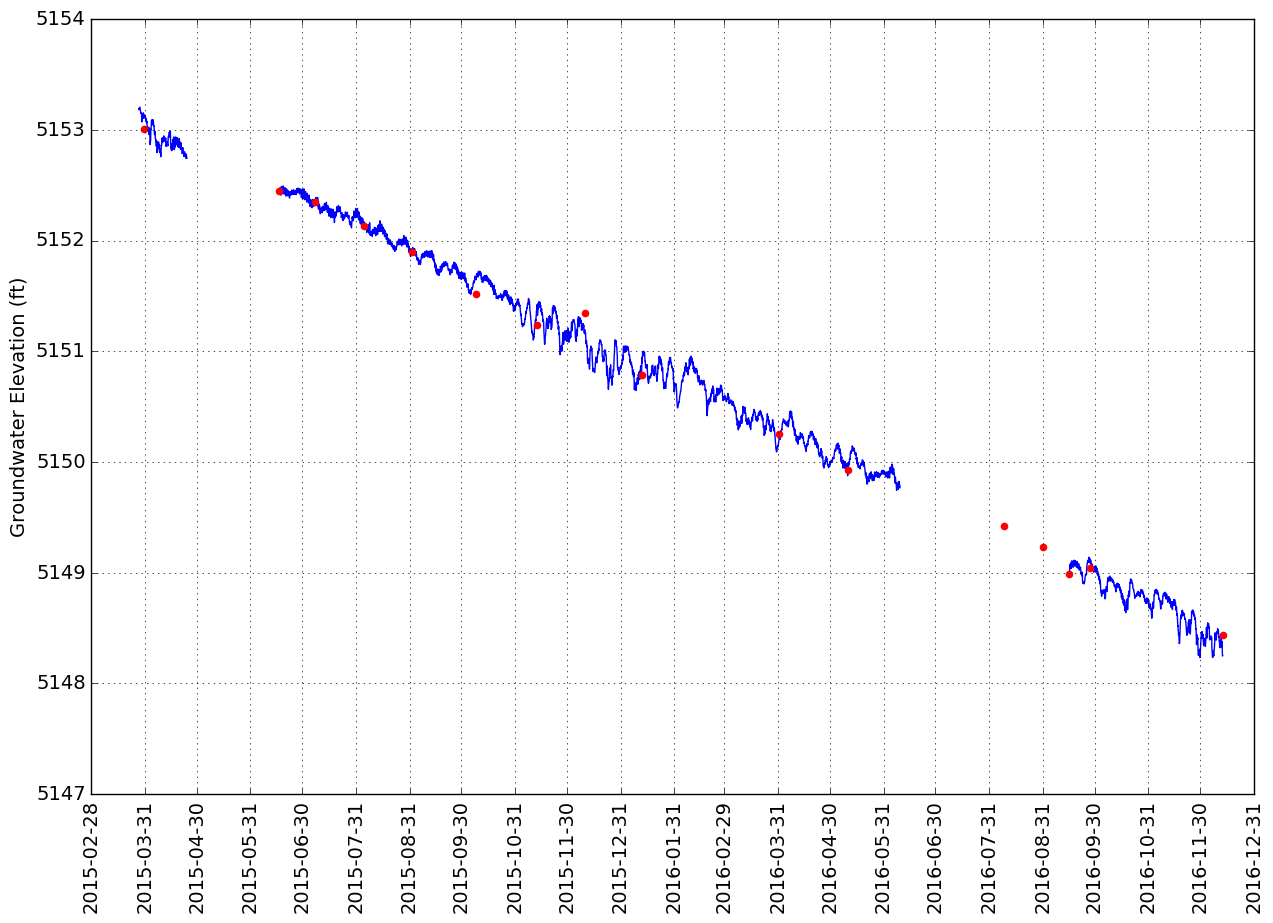

In [64]:
import matplotlib
SIZE = 14
x1 = WellBaro.index
x2 = manual.index
y1 = WellBaro.wl_elev
y2 = manual.Elev
rcParams['figure.figsize'] = 15, 10
matplotlib.rc('font', size=SIZE)
matplotlib.rc('pdf', fonttype=42)


plt.figure()

plt.plot(x1,y1,color='blue',zorder=0)
plt.scatter(x2,y2,color='red',zorder=1)


date_rng = pd.date_range('2/1/2015', periods=23, freq='1M',closed='left',normalize=True)

#date_range = date_rng.map(lambda t: t.strftime('%Y-%m-%d'))
date_labs = date_rng.map(lambda t: t.strftime('%Y-%m-%d'))
plt.xticks(date_rng,date_labs,rotation=90)
plt.xlim(date_rng[0],date_rng[-1])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.grid()
plt.ylabel('Groundwater Elevation (ft)')
plt.savefig('U:\GWP\Juab Valley\Solinst Files\graph.pdf')



In [52]:
beg

datetime.datetime(2015, 2, 1, 0, 0)

In [18]:
WellBaro.to_csv("U:\GWP\Juab Valley\Solinst Files\output.csv")

# USGS

In [ ]:
figplace= 'U:/GWP/Juab Valley/Paul/'

In [ ]:
1602020101
1603000502

In [ ]:
HUCName = {16020203:'Provo'}

allsites,alldata = wa.get_nwis(16020203, selectType='gw_huc')
siteList = list(allsites.site_no.unique())
allsites.to_csv(fileplace+'usgs_well_locals.csv')
alldata.reset_index(inplace=True)
print('{:} measurements from {:} sites imported!'.format(len(alldata), len(allsites)))

In [ ]:
for site in siteList:
    mean = alldata.ix[alldata.site_no==site, 'value'].mean()
    std = alldata.ix[alldata.site_no==site, 'value'].std()
    alldata.ix[alldata.site_no==site, 'avgDiffWL'] = alldata.ix[alldata.site_no==site, 'value'] - mean
    alldata.ix[alldata.site_no==site, 'stdWL'] = alldata.ix[alldata.site_no==site, 'avgDiffWL']/std


In [ ]:
alldata.reset_index(inplace=True)
alldata['datetime'] = pd.to_datetime(alldata['datetime'])
alldata.set_index(['datetime'],inplace=True)

In [ ]:
#alldata.drop(['index'], axis=1, inplace=True)
alldata['year'] = alldata.index.year
alldata['month'] = alldata.index.month
alldata['doy'] = alldata.index.dayofyear
alldata['julian'] = alldata.index.to_julian_date()    

In [ ]:
balldata = alldata.reset_index()
balldata.drop_duplicates(subset = ['site_no','datetime'], inplace=True)
provopivdata = balldata.pivot(index= 'datetime', columns = 'site_no', values = 'stdWL').sort_index()
pivdataAll = balldata.pivot(index= 'datetime', columns = 'site_no', values = 'value')
pivdataAll.sort_index(inplace=True)
pivdata = pivdataAll.resample('A').mean()

In [ ]:
SIZE = 11
matplotlib.rc('font', size=SIZE)
matplotlib.rc('pdf', fonttype=42)

gntAll = wa.gantt(pivdataAll)
infoAll = gntAll.sitestats #summary statistics for original data
gnt = wa.gantt(pivdata)
info = gnt.sitestats #summary statistics for annual data
infoless = info[info['count']>4] #select only sites having more than 4 years of data; non-consecutive, one sample per year
provolist = list(infoless.StationId.values)
df = alldata[alldata['site_no'].isin(provolist)]
print(len(provolist))
gntshort = wa.gantt(pivdata, provolist)
numsites = len(gntshort.sitestats)
rcParams['figure.figsize'] = 20, 20
gntshort.ganttPlotter() #plot data
plt.ylabel('USGS Site Number')
plt.xlim(pd.datetime(1935,1,1),pd.datetime(2017,1,1))
date_range = pd.date_range('1935-01-01', '2017-01-01', freq='36M')
date_range = date_range.map(lambda t: t.strftime('%Y-%m-%d'))
plt.xticks(date_range)
plt.title('Measurement Intervals for USGS Wells in Provo Watershed')
plt.tight_layout()

plt.savefig(figplace+'ProvoGantt_long.pdf')

In [ ]:
dataXY = pd.merge(infoAll, allsites, right_on='site_no', left_on='StationId', how='left')
dataXY['WL_Elev'] = dataXY[['median','Elev']].apply(lambda x: x[1]*3.2808-x[0],1)

df2PntFt(dataXY,'UTM_X','UTM_Y',shpplace,'USGS_Provo_Lev','MapData.gdb',26912)

In [ ]:
grp = pd.TimeGrouper("12M")
data = 'stdWL'#'avgDiffWL'#'diff'#'std_dWL'
title = 'Average Difference from Mean Water Level (ft)'
wid = 4
cen = True

def confintpls(x):
    return np.mean(x)+(np.std(x)*2.0)#/np.sqrt(np.size(x)))*1.96

def confintmin(x):
    return np.mean(x)-(np.std(x)*2.0)#/np.sqrt(np.size(x)))*1.96

df = alldata[alldata['site_no'].isin(provolist)]

grpd = df.groupby([grp])[data].agg({'median':np.median,'mean':np.mean,'confpls':confintpls,'confmin':confintmin,'count':np.size})#,'confintmin':confintmin})

x2 = grpd.index
y2 = grpd['mean']
y3 = grpd['median']
snakegrp = grpd.median().to_frame()

SIZE = 11
matplotlib.rc('font', size=SIZE)
matplotlib.rc('pdf', fonttype=42)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x2, y3, '+-', color = 'green', label = 'Median' )
ax.plot(x2, y2, '+-', color = 'red', label = 'Average' )
ax.fill_between(x2,grpd['confmin'],grpd['confpls'],alpha=0.2,label='2 Standard Deviations',linewidth=0)

#ax1.set_ylim(3.5,-3.5)
ax.set_ylabel(title, color='red')
ax.invert_yaxis()
ax.grid()
ax2 = ax.twinx()
ax2.plot(x2,grpd['count'],label='Observations count')
ax2.set_ylim(0,1000)
ax2.set_yticks(range(0,420,20))
ax2.set_ylabel('Number of Observations',color='blue')
ax2.yaxis.set_label_coords(1.03,0.2)
ax.set_xlim(pd.datetime(1950,1,1),pd.datetime(2017,1,1))
date_range = pd.date_range('1950-01-01', '2017-01-01', freq='36M')
date_range = date_range.map(lambda t: t.strftime('%Y-%m-%d'))
ax.set_xticks(date_range)
ax.set_xlabel('date')
# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('Average Deviation from Mean of Depth to Water for {:} Wells in the Provo Watershed (16020203)'.format(len(provolist)))
plt.savefig(figplace+'Provo_USGS_avg_stdev.pdf')

In [ ]:
grp = pd.TimeGrouper("12M")
data = 'avgDiffWL'#'diff'#'std_dWL'
title = 'Difference from Mean Water Level (ft)'
wid = 4
cen = True

def confintpls(x):
    return np.mean(x)+(np.std(x)*2.0)#/np.sqrt(np.size(x)))*1.96

def confintmin(x):
    return np.mean(x)-(np.std(x)*2.0)#/np.sqrt(np.size(x)))*1.96

df = alldata[alldata['site_no'].isin(provolist)]

grpd = df.groupby([grp])[data].agg({'median':np.median,'mean':np.mean,'confpls':confintpls,'confmin':confintmin,'count':np.size})#,'confintmin':confintmin})

x2 = grpd.index
y2 = grpd['mean']
y3 = grpd['median']
snakegrp = grpd.median().to_frame()

SIZE = 11
matplotlib.rc('font', size=SIZE)
matplotlib.rc('pdf', fonttype=42)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x2, y3, '+-', color = 'green', label = 'Median' )
ax.plot(x2, y2, '+-', color = 'red', label = 'Average' )
ax.fill_between(x2,grpd['confmin'],grpd['confpls'],alpha=0.2,label='2 Standard Deviations',linewidth=0)

#ax1.set_ylim(3.5,-3.5)
ax.set_ylabel(title, color='red')
ax.invert_yaxis()
ax.grid()
ax2 = ax.twinx()
ax2.plot(x2,grpd['count'],label='Observations count')
ax2.set_ylim(0,1000)
ax2.set_yticks(range(0,420,20))
ax2.set_ylabel('Number of Observations',color='blue')
ax2.yaxis.set_label_coords(1.03,0.2)
ax.set_xlim(pd.datetime(1950,1,1),pd.datetime(2017,1,1))
date_range = pd.date_range('1950-01-01', '2017-01-01', freq='36M')
date_range = date_range.map(lambda t: t.strftime('%Y-%m-%d'))
ax.set_xticks(date_range)
ax.set_xlabel('date')
# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('Deviation from Mean of Depth to Water for {:} Wells in the Provo Watershed (16020203)'.format(len(provolist)))
plt.savefig(figplace+'Provo_USGS_dev_avg.pdf')